<a href="https://colab.research.google.com/github/abliskan/Superstore-Sales-Analysis/blob/main/Dqlab_data_analyst_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Superstore Data Analysis and Visualization***


# Table of Contents
1. Background
2. Objective
3. Data understanding
4. Business question
5. Data pre-processing
6. Exploratory Data Analysis (EDA)
7. Data Features

## Background
DQLab superstore is a store that sales all kind of product. Store management noticed it's very difficult to keep track about growing demands of sales every year and keep up with other competitor in the market. <br><br>
To pursue of knowledge to understand how customer behaviors, the store manager is seeking ideas on how to optimize profits.

## Objective
Identiying superstore customer characteristic based on their purchasing history

## Data Understanding

### Library Used
1. Pandas
2. Matplotlib
3. Numpy
4. Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec

### Data Information

In [ ]:
# Read and view data
df = pd.read_csv('SuperStore.csv');
display(df.head(6))

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
5,CA-2017-115812,BH-11710,90032,FUR-FU-10001487,48.8600,7,0.00,14.1694,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,6/9/2017,6/14/2017,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West


In [ ]:
# View dimensions of dataframe
df.shape

(9994, 20)

Kita dapat melihat ada 9994 instance dan 20 atribut dalam dataset.

In [ ]:
# View all information related to dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

Data yang digunakan adalah SuperStore dengan data deskripsi sebagai berikut:

* **Order ID** Unique Order ID for each Customer.
* **Customer ID** Unique ID to identify each Customer.
* **Postal Code** Postal Code of every Customer.
* **Product ID** Unique ID of the Product.
* **Sales** Sales of the Product.
* **Quantity** Quantity of the Product.
* **Discount** Discount provided.
* **Profit** Profit/Loss incurred.
* **Category** Category of the product ordered.
* **Sub-Category** Sub-Category of the product ordered.
* **Product Name** Name of the Product.
* **Order Date** Order Date of the product.
* **Ship Date** Shipping Date of the Product.
* **Ship Mod** Shipping Mode specified by the Customer.
* **Customer Name** Name of the Customer.
* **Segment** The segment where the Customer belongs.
* **Country** Country of residence of the Customer.
* **City** City of residence of of the Customer.
* **State** State of residence of the Customer.
* **Region** Region where the Customer belong.

Untuk Link download datanya adalah
[SuperStore](https://docs.google.com/spreadsheets/d/1DBpK4Pg3xjLNB_lAaEsGLV0groj0XXfLzxJrCz2lmic/edit#gid=410161316)


### Descriptive Statistic

In [ ]:
# View details of descriptive statistic
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


* `mean`: Calculates the mean (average) of the values in the specified column(s).
* `min`: Returns the minimum value in the specified column(s).
* `max`: Returns the maximum value in the specified column(s).
* `count`: Counts the number of values in the specified column(s).
* `std`: Calculates the standard deviation of the values in the specified column(s).

## Data Pre-processing

### Data Cleaning: Data Type Conversions

In [ ]:
# Converting format time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9994 non-null   object        
 1   Customer_ID     9994 non-null   object        
 2   Postal_Code     9994 non-null   int64         
 3   Product_ID      9994 non-null   object        
 4   Sales           9994 non-null   float64       
 5   Quantity        9994 non-null   int64         
 6   Discount        9994 non-null   float64       
 7   Profit          9994 non-null   float64       
 8   Category        9994 non-null   object        
 9   Sub-Category    9994 non-null   object        
 10  Product_Name    9994 non-null   object        
 11  Order_Date      9994 non-null   datetime64[ns]
 12  Ship_Date       9994 non-null   datetime64[ns]
 13  Ship_Mode       9994 non-null   object        
 14  Customer_Name   9994 non-null   object        
 15  Segm

### Data Cleaning: Handling Missing Values

In [ ]:
# Count the number of missing values in each column
df.isnull().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [ ]:
# View the number of missing values in percent
df.isnull().sum() / len(df) *100.00

Order_ID          0.0
Customer_ID       0.0
Postal_Code       0.0
Product_ID        0.0
Sales             0.0
Quantity          0.0
Discount          0.0
Profit            0.0
Category          0.0
Sub-Category      0.0
Product_Name      0.0
Order_Date        0.0
Ship_Date         0.0
Ship_Mode         0.0
Customer_Name     0.0
Segment           0.0
Country/Region    0.0
City              0.0
State             0.0
Region            0.0
dtype: float64

### Data Cleaning: Deduplication

In [ ]:
# Check if there any duplicate value
print(df[df.duplicated()] == True)

      Order_ID  Customer_ID  Postal_Code  Product_ID  Sales  Quantity  \
3406     False        False        False       False  False     False   

      Discount  Profit  Category  Sub-Category  Product_Name  Order_Date  \
3406     False   False     False         False         False       False   

      Ship_Date  Ship_Mode  Customer_Name  Segment  Country/Region   City  \
3406      False      False          False    False           False  False   

      State  Region  
3406  False   False  


## Exploratory Data Analysis (EDA)

In [ ]:
# Custom color for pie plot
colors = sns.color_palette('pastel')[0:4]

### Comparison Sales Between 2019 & 2020 from Jan to Desc

In [ ]:
# Changing the data type for date columns
timestamp_cols = ['Order_Date']
for col in timestamp_cols:
    df[col] = pd.to_datetime(df[col])

# Extracting attributes for Order date - Year and Month
df['order_date_year'] = df['Order_Date'].apply(lambda x: x.year)
df['order_date_month'] = df['Order_Date'].apply(lambda x: x.month)

# Extracting attributes for Order date - Day and Day of Week
df['order_date_day'] = df['Order_Date'].apply(lambda x: x.day)

# New Superstore DataFrame after transformations
display(df[['Order_ID', 'Order_Date', 'order_date_day', 'order_date_month', 'order_date_year']].head(6))

,Order_ID,Order_Date,order_date_day,order_date_month,order_date_year
0,CA-2019-152156,2019-11-08,8,11,2019
1,CA-2019-152156,2019-11-08,8,11,2019
2,CA-2019-138688,2019-06-12,12,6,2019
3,US-2018-108966,2018-10-11,11,10,2018
4,US-2018-108966,2018-10-11,11,10,2018
5,CA-2017-115812,2017-06-09,9,6,2017


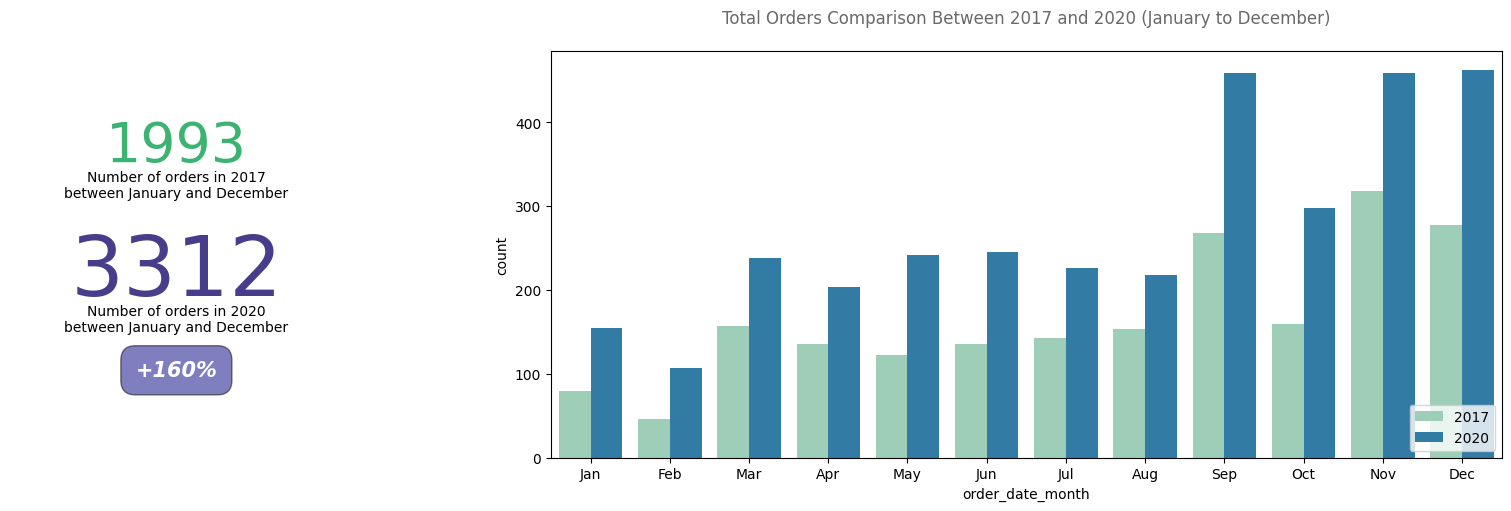

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 5))

# Axis definition
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax1 = fig.add_subplot(gs_fig[0, 0])
ax2 = fig.add_subplot(gs_fig[0, 1:])

# Growth Calculation on Superstore's orders between 2017 and 2020
df_stores_compare = df.query('order_date_year in (2017, 2020) & order_date_month <=12')
year_orders = df_stores_compare['order_date_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2020]), 0))
ax1.text(0.35, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.35, 0.64, 'Number of orders in 2017\nbetween January and December', fontsize=10, ha='center')
ax1.text(0.35, 0.40, f'{year_orders[2020]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.35, 0.31, 'Number of orders in 2020\nbetween January and December', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.35, 0.20, f'{signal}{growth}%', fontsize=15, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2020
ax = sns.countplot(data=df_stores_compare, x="order_date_month", hue="order_date_year", ax=ax2, palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2020 (January to December)', size=12, color='dimgrey', pad=20)

plt.legend(loc='lower right')
plt.show()

# Saving the matplotlib, seaborn figure
plt.savefig("Order-growth-2017-2020.png", dpi = 150)
files.download("Order-growth-2017-2020.png")

### Most Ordered by Category

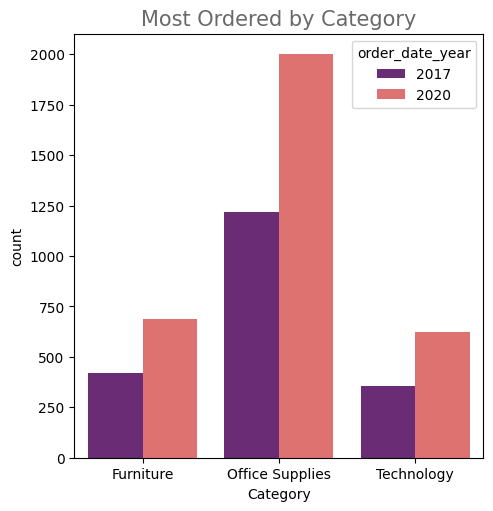

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax2 = fig.add_subplot(gs_fig[0,1:2])

# Create a bar plot
sns.countplot(data=df_stores_compare, x="Category", hue="order_date_year", ax=ax2, palette='magma')

# Set subplot properties
ax2.set_title('Most Ordered by Category', size=15, color='dimgrey')

plt.show()

### Most Ordered Fullfilment by Ship Mode

In [ ]:
df['Ship_Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

<Axes: ylabel='Ship_Mode'>

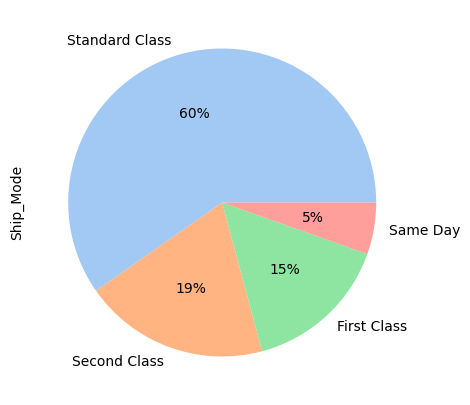

In [ ]:
plt.figure(figsize=(10,5))

df['Ship_Mode'].value_counts().plot.pie(colors = colors, autopct='%.0f%%')

### Most Order come from by region

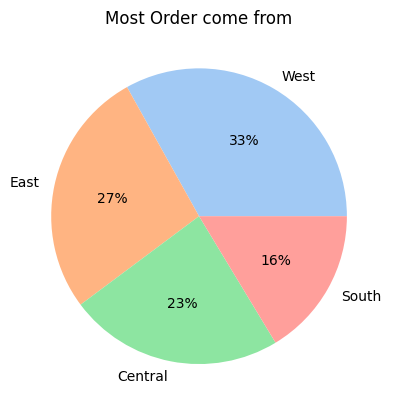

In [ ]:
plt.pie(df_stores_compare['Region'].value_counts().values, labels = df_stores_compare['Region'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Most Order come from")
plt.show()

### Sales by Quarter per Year

In [ ]:
df_stores_compare['quarter'] = df_stores_compare['Order_Date'].dt.quarter

<ipython-input-12-6a3ec506d034>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stores_compare['quarter'] = df_stores_compare['Order_Date'].dt.quarter


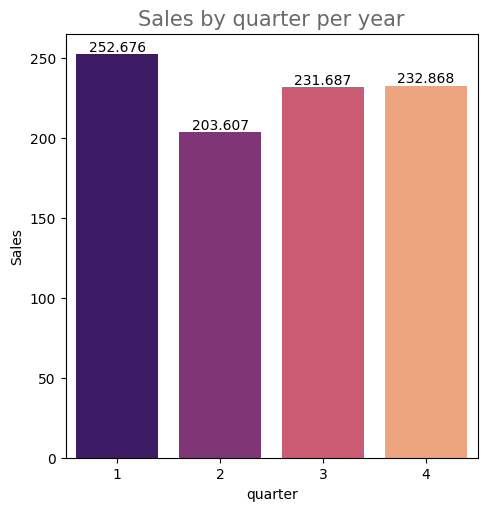

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax1 = fig.add_subplot(gs_fig[0,0])

# Grouping data by Quarter Year with Sales
data_quarter = df_stores_compare.groupby('quarter').agg({'Sales': 'mean'}).reset_index()

# Create a bar plot
ax= sns.barplot(x='quarter', y='Sales', data=data_quarter, ax=ax1, palette='magma');

# Set subplot properties
ax1.set_title('Sales by quarter per year', size=15, color='dimgrey')
ax.bar_label(ax.containers[0]);

plt.show()

### Profit by Quarter per Year

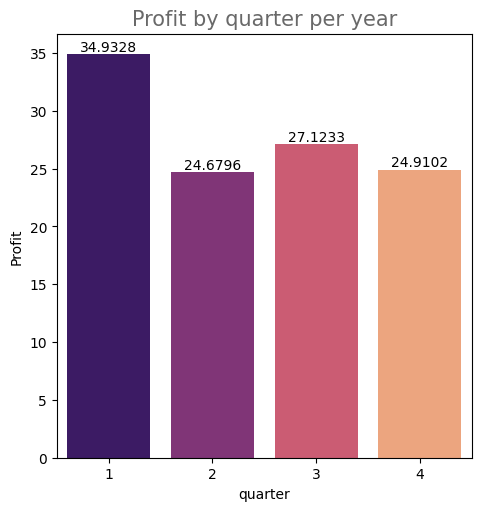

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax1 = fig.add_subplot(gs_fig[0,0])

# Grouping data by Quarter Year with Profit
data_quarter = df_stores_compare.groupby('quarter').agg({'Profit': 'mean'}).reset_index()

# Create a bar plot
ax= sns.barplot(x='quarter', y='Profit', data=data_quarter, ax=ax1, palette='magma');

# Set subplot properties
ax1.set_title('Profit by quarter per year', size=15, color='dimgrey')
ax.bar_label(ax.containers[0]);

plt.show()

### Sales Growth per Year

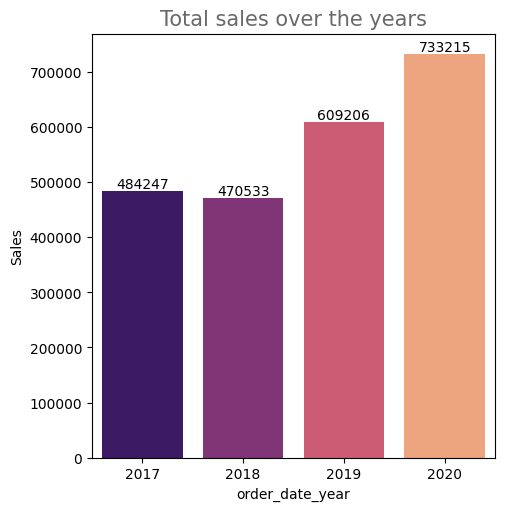

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax1 = fig.add_subplot(gs_fig[0,0])

# Grouping data by Order Date (Year) with Sales
data_year = df.groupby('order_date_year').agg({'Sales': 'sum'}).reset_index()

# Create a bar plot
sns.barplot(x='order_date_year', y='Sales', data=data_year, ax=ax1, palette='magma')

# Set subplot properties
ax1.set_title('Total sales over the years', size=15, color='dimgrey')
ax1.bar_label(ax1.containers[0]) # This will extract and display the bar value in the bar plot

plt.show()

### Profit Growth per Year

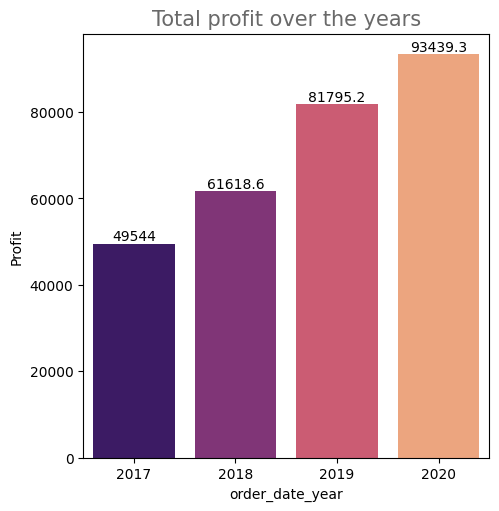

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax1 = fig.add_subplot(gs_fig[0,0])

# Grouping data by Order Date (Year) with Sales
data_year = df.groupby('order_date_year').agg({'Profit': 'sum'}).reset_index()

# Create a bar plot
sns.barplot(x='order_date_year', y='Profit', data=data_year, ax=ax1, palette='magma')

# Set subplot properties
ax1.set_title('Total profit over the years', size=15, color='dimgrey')
ax1.bar_label(ax1.containers[0]) # This will extract and display the bar value in the bar plot

plt.show()

### Category Per Sales

In [ ]:
# Calculation for profit
value1 = df.groupby('Category')[['Sales', 'Profit']].sum()
value1['Profit(%)'] = value1['Profit'] * 100 / value1['Sales']
value1

,Sales,Profit,Profit(%)
Category,,,
Furniture,741999.7953,18451.2728,2.486695
Office Supplies,719047.0320,122490.8008,17.035158
Technology,836154.0330,145454.9481,17.395712


<ipython-input-34-ca5af375eb60>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_category_sales = df.groupby(by='Category', as_index=False).sum().loc[:, ['Category', 'Sales']]


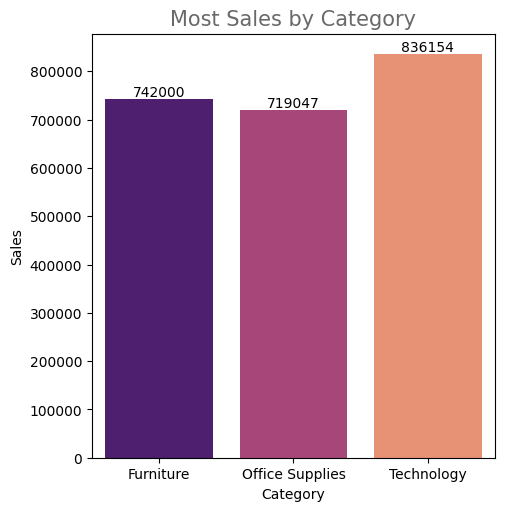

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax2 = fig.add_subplot(gs_fig[0,1:2])

# Grouping data by Category with Sales
df_category_sales = df.groupby(by='Category', as_index=False).sum().loc[:, ['Category', 'Sales']]

# Create a bar plot
sns.barplot(y='Sales', x='Category', data=df_category_sales, ax=ax2, palette='magma')

# Set subplot properties
ax2.set_title('Most Sales by Category', size=15, color='dimgrey')
ax2.bar_label(ax2.containers[0]) # This will extract and display the bar value in the bar plot

plt.show()

### Category per Profit

<ipython-input-39-86f59c040c45>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_category_profit = df.groupby(by='Category', as_index=False).sum().loc[:, ['Category', 'Profit']]


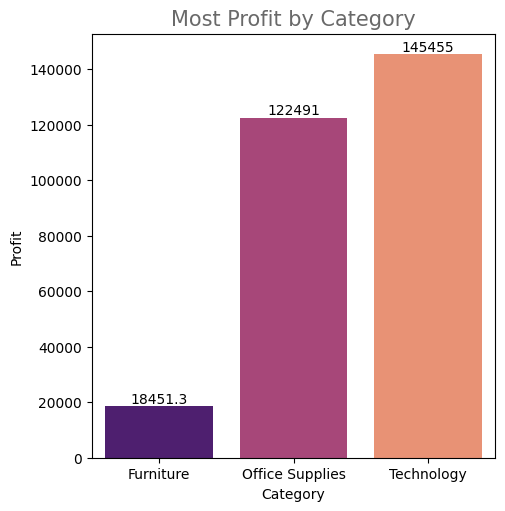

In [ ]:
# Adjust the figure size
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition with GridSpec
gs_fig = GridSpec(1, 3, figure=fig)

# Create the first subplot
ax1 = fig.add_subplot(gs_fig[0,0])

# Grouping data by Category with Profit
df_category_profit = df.groupby(by='Category', as_index=False).sum().loc[:, ['Category', 'Profit']]

# Create a bar plot
sns.barplot(x='Category', y='Profit', data=df_category_profit, ax=ax1, palette='magma')

# Set subplot properties
ax1.set_title('Most Profit by Category', fontsize=15, color='dimgrey')
ax1.bar_label(ax1.containers[0])

plt.show()

### Number of Sales by Category in Different Region

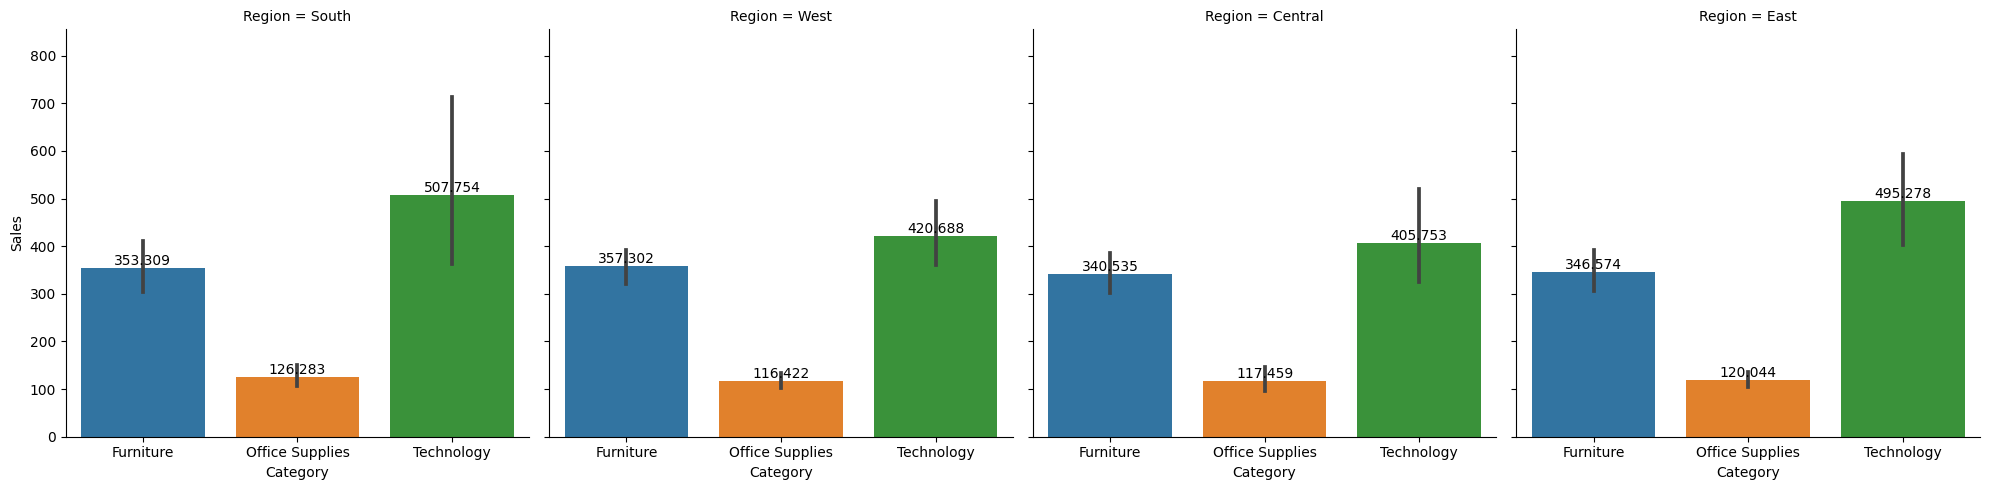

In [ ]:
# Draw a nested barplot by Category,Sales, and Region
ax = sns.catplot( data=df, x="Category", y="Sales", col="Region", kind="bar")

# iterate through axes
for ax1 in ax.axes.ravel():

    # add annotations
    for c in ax1.containers:
        # add custom labels
        ax1.bar_label(c, label_type='edge')

    ax1.margins(y=0.2)

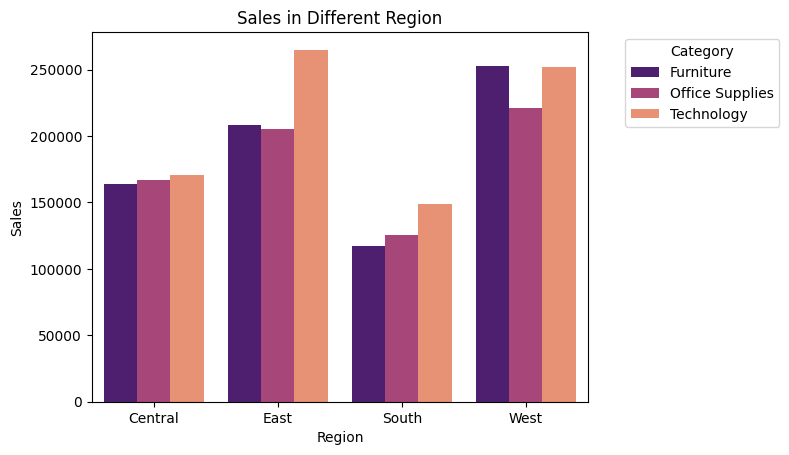

In [ ]:
# Grouping data by Category with Profit
df_sum = df.groupby(by=["Category", "Region"], as_index=False).agg({"Sales":sum})

# Create a bar plot
sns.barplot(x = 'Region', y = 'Sales', data = df_sum, hue = 'Category', palette='magma')

# Set subplot properties
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='Category')
plt.title('Sales in Different Region')

plt.show()

### Number of Profit by Category in Different Region

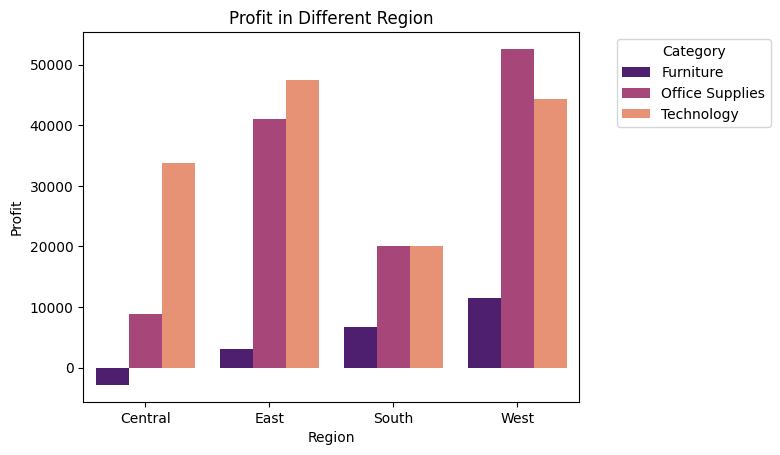

In [ ]:
# Grouping data by Category with Profit
df_sum = df.groupby(by=["Category", "Region"], as_index=False).agg({"Profit":sum})

# Create a bar plot
sns.barplot(x = 'Region', y = 'Profit', data = df_sum, hue = 'Category', palette='magma')

# Set subplot properties
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='Category')
plt.title('Profit in Different Region')

plt.show()

### Profit per Region

In [ ]:
# Create label and value from region and profit column
labels = df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

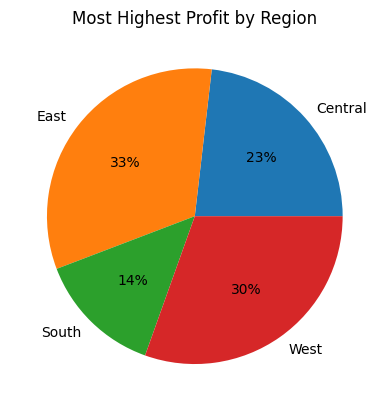

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a pie plot
plt.pie(values, labels = labels, autopct = '%.0f%%')
plt.title('Most Highest Profit by Region')

plt.show()

#### Profit per Region in Technology Category

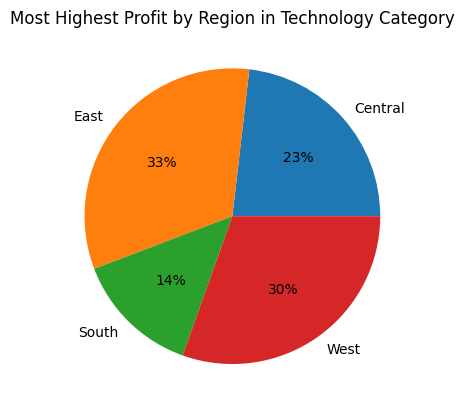

<Figure size 640x480 with 0 Axes>

In [ ]:
# Pick technology category for pie plot
df_tech = df[df['Category'] == 'Technology']

# Create label and value from region and profit column
labels = df_tech.groupby('Region')['Profit'].sum().index
values = df_tech.groupby('Region')['Profit'].sum().values

# Create a pie plot
plt.pie(values, labels = labels, autopct = '%.0f%%')

# Set subplot properties
plt.title('Most Highest Profit by Region in Technology Category')

plt.show()

### Most Quantity Product that has been sold by Region and Category

<Axes: title={'center': 'Quantity that has been sold'}, ylabel='Region,Category'>

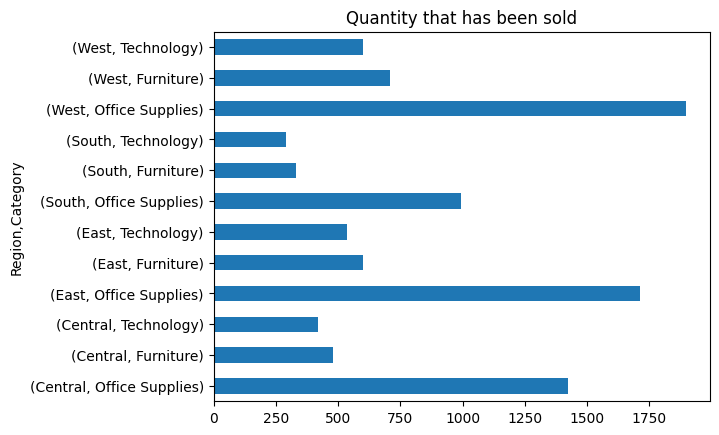

In [ ]:
# Grouping data by Region with Category and create bar plot
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')

### Top 5 states that made the most sales in Technology

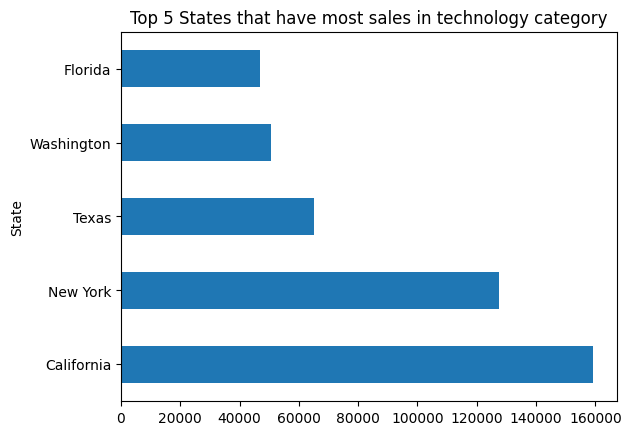

In [ ]:
# Pick technology category for bar plot
df_category = df[df['Category'] == 'Technology']
df_state_profit = df_category.groupby('State')['Sales'].sum().sort_values(ascending=False)[:5].plot(kind='barh', title='Top 5 States that have most sales in technology category')

### Top 5 states that made the most profit in Office Supplies

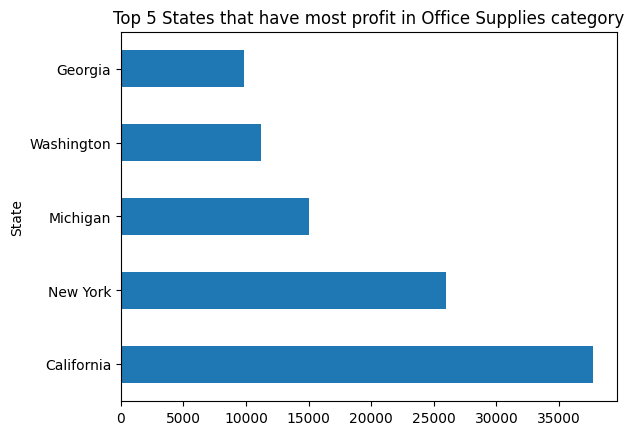

In [ ]:
# Pick technology category for bar plot
df_category = df[df['Category'] == 'Office Supplies']
df_state_profit = df_category.groupby('State')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='barh', title='Top 5 States that have most profit in Office Supplies category')

### Top 5 product that have most ordered

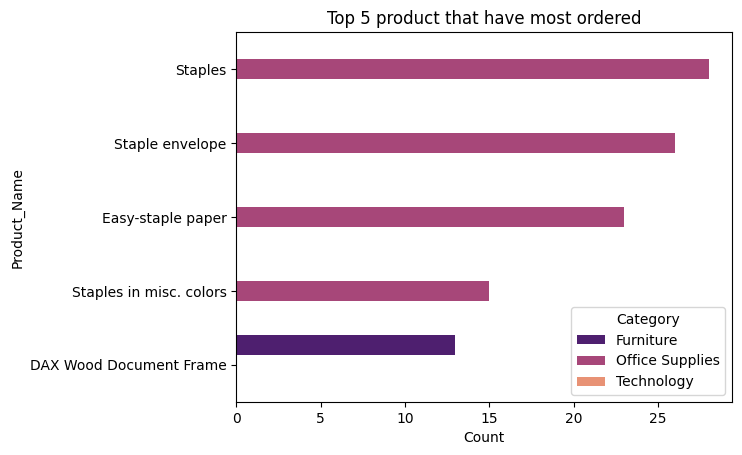

In [ ]:
# Create a count plot
sns.countplot(data=df_stores_compare, y="Product_Name", hue="Category"
              , order=df_stores_compare.value_counts(df_stores_compare['Product_Name']).iloc[:5].index
              , palette='magma')

# Set subplot properties
plt.xlabel('Count')
plt.title('Top 5 product that have most ordered')

plt.show()

### Top product in each sub-category

In [ ]:
# Grouping data by Region with Sub-Category and Product_Name, then do aggregation sum with sales
df_top_prd = df_stores_compare.groupby(['Sub-Category', 'Product_Name']).agg({'Sales':'sum'}).reset_index()
df_top_prd.sort_values(by=['Sales'], ascending=False, inplace=True)
# Grouping data by Region with Sub-Category and Product_Name, then create rank with dense
df_top_prd['rank'] = df_top_prd.groupby(['Sub-Category'])['Sales'].rank('dense',ascending=False)
df_top_prd.head(6)

,Sub-Category,Product_Name,Sales,rank
709,Copiers,Canon imageCLASS 2200 Advanced Copier,35699.898,1.0
1031,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,1.0
1049,Machines,Lexmark MX611dhe Monochrome Laser Printer,16829.901,2.0
463,Binders,GBC DocuBind TL300 Electric Binding System,16684.014,1.0
1641,Supplies,Martin Yale Chadless Opener Electric Letter Op...,15989.952,1.0
460,Binders,GBC DocuBind P400 Electric Binding System,12521.108,2.0


### Top product in each sub-category

<Axes: title={'center': 'Top product in each sub-category'}, ylabel='Sub-Category'>

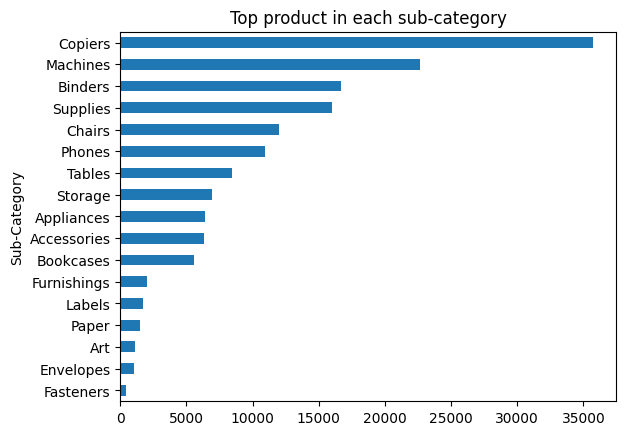

In [ ]:
# Pick sub-Category that rank number 1
df_top = df_top_prd[df_top_prd['rank'] == 1]
df_top.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='Top product in each sub-category')

In [ ]:
# Show all list of sub-Category that got rank number 1
df_top

,Sub-Category,Product_Name,Sales,rank
709,Copiers,Canon imageCLASS 2200 Advanced Copier,35699.8980,1.0
1031,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.4800,1.0
463,Binders,GBC DocuBind TL300 Electric Binding System,16684.0140,1.0
1641,Supplies,Martin Yale Chadless Opener Electric Letter Op...,15989.9520,1.0
655,Chairs,HON 5400 Series Task Chairs for Big and Tall,11986.7580,1.0
1455,Phones,Samsung Galaxy Mega 6.3,10919.7400,1.0
1667,Tables,Bretford Rectangular Conference Table Tops,8444.1185,1.0
1600,Storage,Tennsco 6- and 18-Compartment Lockers,6947.4540,1.0
196,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,6433.9100,1.0
43,Accessories,Logitech G19 Programmable Gaming Keyboard,6327.3300,1.0


### Multivariate Analysis

In [ ]:
# Finding correlation relationship between columns
df.corr()

<ipython-input-15-d018b0f2aed4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal_Code,Sales,Quantity,Discount,Profit,order_date_year,order_date_month,order_date_day
Postal_Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,0.004298,0.026234,0.016845
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064,-0.009679,-0.000625,0.003152
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253,-0.005810,0.023355,0.011598
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.002662,-0.004935,-0.004019
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.004670,-0.000502,-0.002964
order_date_year,0.004298,-0.009679,-0.005810,-0.002662,0.004670,1.000000,-0.020183,-0.017458
order_date_month,0.026234,-0.000625,0.023355,-0.004935,-0.000502,-0.020183,1.000000,-0.033562
order_date_day,0.016845,0.003152,0.011598,-0.004019,-0.002964,-0.017458,-0.033562,1.000000


<ipython-input-8-bbef99e5f5ee>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  store_df_correlations = df.corr(method='pearson')


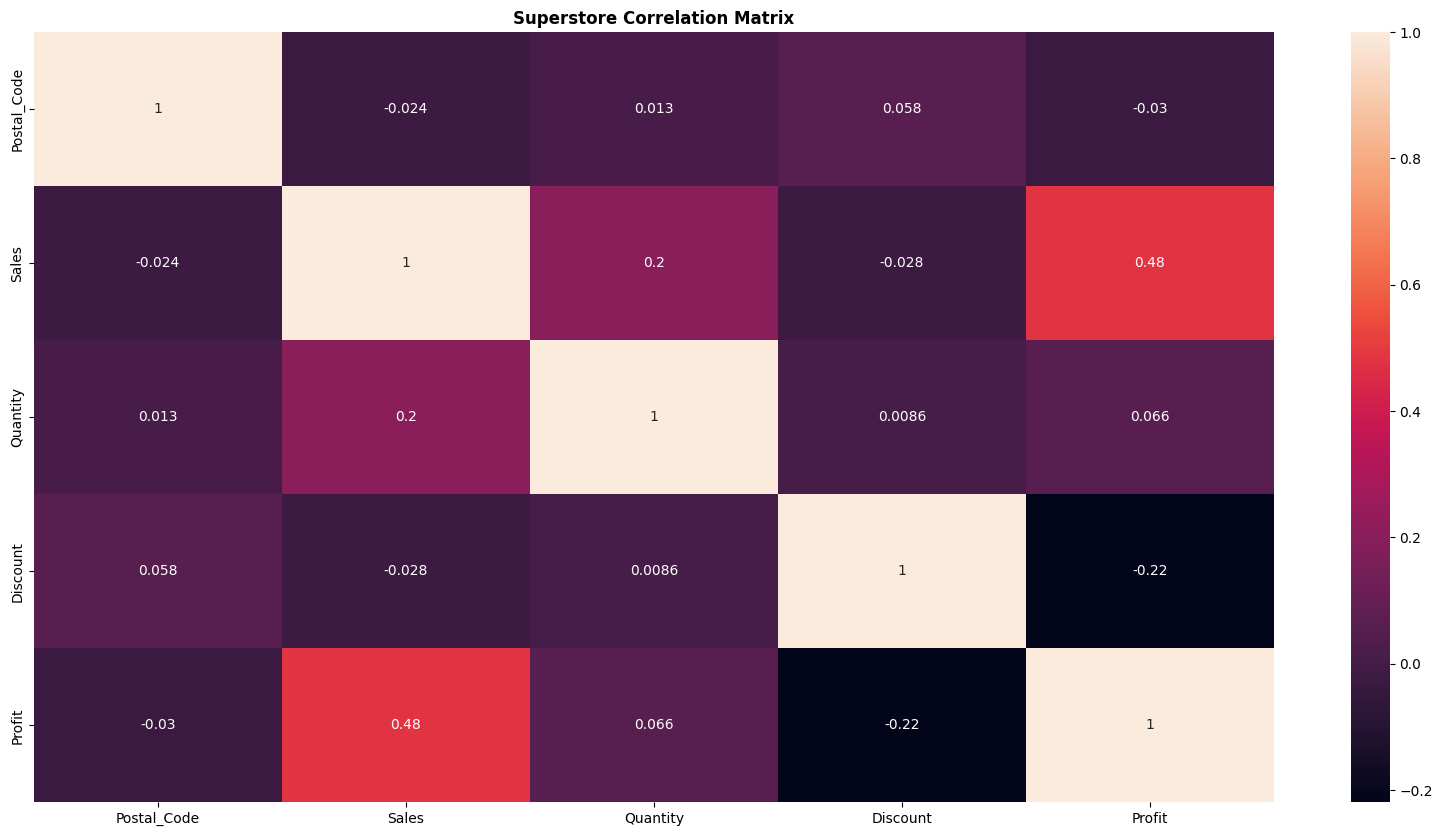

In [ ]:
# Adjust the figure size
plt.figure(figsize=(20,10))

#Use the pearson for correlation matrix
df_correlation = df.corr(method='pearson')

# Create a heatmap
sns.heatmap(df_correlation, annot=True)

# Set subplot properties
plt.title('Superstore Correlation Matrix', fontsize=12, fontweight='bold')

plt.show()

## Data Visualization with Google Looker Studio
Link to access data visualization  <br>
[SuperStore Sales Review](https://lookerstudio.google.com/reporting/e7539802-b112-4cd4-86ad-c78a6ec5e09b)